# COGS 108 - Final Project 

# Overview

In this project we gathered information regarding song audio attributes using a dataset from the Spotify API. We utilized this dataset to find trends in audio attributes across different music genres and analyze which attributes are significant in defining boundaries between genres. We used multiple methods such as visualizing our data, correlation, and dimesionality reduction, to name a few.

# Team Name

G.O.O.D. (Greater Observation Of Data) Music

# Group Members

- Bilal Salinggih
- James Yu
- Jared Suasin
- Dilraj Sandhu
- Franz Quijano

###### Group Members IDs

- A13674432
- A15598575
- A12650991
- A15747688
- A13143611

# Research Question

Is there a significant difference in audio attributes between different genres? Can we use the relationship between attributes of a song and its genre to predict the genre a specific song belongs to?

# Hypothesis


We hypothesize that certain audio attributes will help to distinguish the song attributes of specific genres. From this, we believe it to be possible to define genre boundaries and predict if a song belongs within a certain genre. In particular, we predict that the attributes of ‘acousticness’, ‘danceability’, ‘instrumentalness’, ‘tempo’, and ‘energy’ can be used to determine a song’s genre.

We believe this to be true as genres are defined to categorize different types of music. The attributes of a song make it unique and having information on these characteristics should help us to answer our question.

# Background and Prior Work

Music is separated into specific genres. People are familiar with popular genres such as electronic, rap, and classical. However as music continues to evolve, the lines between genres become more blurred. A recent example of this is Lil Nas X’s song "Old Town Road", a country song with rap elements. Lil Nas X incorporates traditional country elements with guitar and singing in his southern accent, however he also includes rap elements with the use of drums and rap verses. "Old Town Road" was controversially removed from Billboard’s ‘Top Country Songs’ chart due to Billboard's view that song was not representative enough of the Country genre to be included on the chart. From this instance we can see that it can be difficult to define the boundaries of where one genre ends and another begins.

Previous studies have been conducted to attempt genre prediction from song attributes. One machine learning study from the University of Rome Tor Vergata tried to classify music genres using MIDI files and analyzed the instrumentation composition of songs (https://pdfs.semanticscholar.org/e214/5add1318af0654a4901fe92080bc8168a9f4.pdf). 

Another independent study by Victor Ramirez utilized K-Means Clustering to categorize music genres. Ramirez separated songs into different 8 K-Means labels (i.e. Fast & Danceable Instrumentals, Slow Dance, Happy & Upbeat Instrumentals, Slow & Somber Acoustics) and analyzed the audio attributes within each label to find trends (https://medium.com/latinxinai/discovering-descriptive-music-genres-using-k-means-clustering-d19bdea5e443).

Using the findings from these studies we believe that audio attributes significant to predicting a song’s genre are ‘acousticness’, ‘instrumentalness’, ‘danceability’, ‘tempo’, and ‘energy’. We believe ‘acousticness’ and ‘instrumentalness’ can predict a song’s genre as the University of Rome Tor Vergata study was able to classify genres through instrumentation. Similarly, we also believe that ‘danceability’, ‘tempo’, and ‘energy’ can be used to predict a song’s genre as Ramirez was also able to highlight differences across categories based on these audial features.

# Dataset

Dataset Name: Ultimate Spotify Tracks DB 

Link to the dataset: https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db 

Number of observations: 228,159

Information included: Genre, Artist name, Track name, Track ID, Popularity, Acousticness, Danceability, Duration (in milliseconds), Energy, Instrumentalness, Key, Liveness, Loudness, Mode, Speechiness, Tempo, Time-Signature, and Valence.

Since we are attempting to predict attribute trends across genres, we utilized data taken from Spotify's API. This data was organized by Zaheen Hamidani on Kaggle, an online community used by data scientists to host and download datasets. This dataset provides data on over 228,000 songs across 26 genres. It includes song attributes which are determined by Spotify's algorithms. We chose to analyze this dataset due to its large number of observations and amount of variables included that will help us to answer our research question.

# Setup

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
plt.rcParams['figure.figsize'] = (17, 7)
plt.rcParams.update({'font.size': 18})
import patsy
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:232: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '
/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Reads in data from csv
df = pd.read_csv('SpotifyFeatures.csv')
df.head(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Opera,Giuseppe Verdi,"Stiffelio, Act III: Ei fugge! … Lina, pensai c...",7EsKYeHtTc4H4xWiTqSVZA,21,0.986,0.313,490867,0.23100,0.000431,C#,0.0964,-14.287,Major,0.0547,86.001,4/4,0.0886
1,Opera,Giacomo Puccini,Madama Butterfly / Act 1: ... E soffitto e pareti,7MfmRBvqaW0I6UTxXnad8p,18,0.972,0.360,176797,0.20100,0.028000,D#,0.1330,-19.794,Major,0.0581,131.798,4/4,0.3690
2,Opera,Giacomo Puccini,"Turandot / Act 2: Gloria, gloria, o vincitore",7pBo1GDhIysyUMFXiDVoON,10,0.935,0.168,266184,0.47000,0.020400,C,0.3630,-8.415,Major,0.0383,75.126,3/4,0.0696
3,Opera,Giuseppe Verdi,"Rigoletto, Act IV: Venti scudi hai tu detto?",02mvYZX5aKNzdqEo6jF20m,17,0.961,0.250,288573,0.00605,0.000000,D,0.1200,-33.440,Major,0.0480,76.493,4/4,0.0380
4,Opera,Giuseppe Verdi,"Don Carlo / Act 4: ""Ella giammai m'amò!""",03TW0jwGMGhUabAjOpB1T9,19,0.985,0.142,629760,0.05800,0.146000,D,0.0969,-23.625,Major,0.0493,172.935,4/4,0.0382


# Data Cleaning

Need to check for any null values in the columns as it could impact future analyses.

In [3]:
df[df.isnull().any(axis=1)]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence


There are no null values present in the data set.

In [4]:
df['key'].value_counts()

C     26538
G     25196
C#    23567
D     23196
A     21925
F     19382
B     17913
E     17042
F#    15577
A#    15274
G#    15173
D#     7376
Name: key, dtype: int64

In [5]:
df['mode'].value_counts()

Major    147123
Minor     81036
Name: mode, dtype: int64

In [6]:
df['time_signature'].value_counts()

4/4    198092
3/4     22472
5/4      5126
1/4      2461
0/4         8
Name: time_signature, dtype: int64

We are removing specific song attributes from our dataset as we believe that these song attributes are unimportant to our analysis due to their lack of proper scale. Despite the importance of key and time signatures to a song, it will not be the best way to define each genre due it not having much variance. As compared to the other attributes which have much more variability, it is harder to determine a song's genre simply based on key, mode, or time signature. We decided to remove duration_ms as we believe it is not a good indicator to differentiate genre. Thus, we will also remove it from our data set.

In [7]:
del df['duration_ms']
del df['key']
del df['mode']
del df['time_signature']

Checking the basic descriptive statistics of the data to look for any unreasonable values

In [8]:
df.describe()

,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000
mean,44.209130,0.351200,0.554198,0.580967,0.137310,0.214638,-9.354658,0.122442,117.423062,0.444795
std,17.276599,0.351385,0.183949,0.260577,0.292447,0.196977,5.940994,0.186264,30.712458,0.255397
min,0.000000,0.000001,0.056900,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,33.000000,0.030900,0.437000,0.405000,0.000000,0.097700,-11.287000,0.036800,92.734000,0.232000
50%,47.000000,0.205000,0.570000,0.618000,0.000037,0.128000,-7.515000,0.050600,115.347000,0.430000
75%,57.000000,0.689000,0.690000,0.793000,0.023400,0.263000,-5.415000,0.109000,138.887000,0.643000
max,100.000000,0.996000,0.987000,0.999000,0.999000,1.000000,1.585000,0.967000,239.848000,1.000000


From this we can get a grasp how variables are measured by Spotify's API. Popularity is on a scale from 0-100, from least to most popular. This is likely ranked from Spotify's streaming data which counts the number of streams a particular song has.
Acousticness, danceability, energy, instrumentalness, liveness, speechiness, and valence are on a scale from 0.0 - 1.0, from lowest to highest. This is likely determined by Spotify's API from their audio recognition and machine learning models.
Loudness is most likely based on the average decibel level of each song.
Tempo is most likely based on the bpm, or beats per minute of the song.

Additionally, from looking at the basic descriptive statistics, it seems as though there are no clear outliers within the data that we can currently see. We now understand the scale to which each variable is measured.

In [9]:
# groups each song by genre and takes the mean of each attribute, sorting by mean popularity after
grouped = df.groupby(['genre']).mean().sort_values(by='popularity', ascending=False)
grouped

,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
genre,,,,,,,,,,
Pop,66.590667,0.224819,0.640236,0.642208,0.016599,0.179967,-6.495423,0.107963,121.175844,0.481371
Rap,60.533795,0.168080,0.697244,0.650520,0.009317,0.198939,-6.669916,0.188186,121.100808,0.455918
Rock,59.619392,0.196429,0.538292,0.683670,0.053288,0.186981,-7.285875,0.053664,122.629630,0.517113
Hip-Hop,58.423131,0.176172,0.718808,0.643275,0.011200,0.201146,-6.860286,0.205396,120.791039,0.473381
Dance,57.275256,0.152888,0.638191,0.698067,0.035449,0.187753,-6.054241,0.083608,120.795919,0.517754
Indie,54.701561,0.331214,0.566821,0.581002,0.085317,0.168919,-7.915142,0.066724,119.290814,0.428665
Anime,54.659040,0.163175,0.541843,0.706616,0.054340,0.195015,-6.526668,0.086489,121.931104,0.449237
Blues,54.659040,0.163175,0.541843,0.706616,0.054340,0.195015,-6.526668,0.086489,121.931104,0.449237
Children’s Music,54.659040,0.163175,0.541843,0.706616,0.054340,0.195015,-6.526668,0.086489,121.931104,0.449237


There are many genres of music as defined by Spotify, 25 existing in this dataset. We believe it to be necessary to narrow down these genres by combining similar ones such as Hip-hop and rap, and dropping others such as Comedy and A Capella. This will make our analysis easier to follow.

Looking at these statistics, it seems as though Anime, Blues, Children's Music, and Alternative all have the same statistics. We have to clean our dataset as the same songs may be mislabeled for these genres.

In [10]:
df[df['genre']=='Anime'].sort_values(by='track_name').head(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
53485,Anime,Barns Courtney,"""99""",6YQUuoMnRIMaOmouYoMfQr,69,0.005980,0.552,0.804,0.000000,0.1110,-4.299,0.0303,95.980,0.714
58740,Anime,Can't Swim,"""sometimes you meet the right people at the wr...",1J5WWo4zSTWIKD7VFr6wn4,48,0.000109,0.382,0.851,0.000004,0.3350,-6.023,0.0800,197.883,0.331
57302,Anime,Garbage,#1 Crush,0P6USuYzHP8GdAyNKLkTZi,50,0.000294,0.634,0.630,0.001030,0.3490,-7.112,0.0234,94.195,0.424
55208,Anime,The Neighbourhood,#icanteven,0xSfELjbi6QwmprLDu4Nrx,59,0.114000,0.359,0.625,0.000019,0.0787,-9.387,0.1460,111.866,0.154
58978,Anime,Max Frost,$Dreams,6QZtmgaUkxWk3Rlq3Upll6,50,0.019400,0.800,0.626,0.004160,0.1030,-6.043,0.0482,106.974,0.792


In [11]:
df[df['genre']=='Blues'].sort_values(by='track_name').head(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
81114,Blues,Barns Courtney,"""99""",6YQUuoMnRIMaOmouYoMfQr,69,0.005980,0.552,0.804,0.000000,0.1110,-4.299,0.0303,95.980,0.714
24889,Blues,Can't Swim,"""sometimes you meet the right people at the wr...",1J5WWo4zSTWIKD7VFr6wn4,48,0.000109,0.382,0.851,0.000004,0.3350,-6.023,0.0800,197.883,0.331
23451,Blues,Garbage,#1 Crush,0P6USuYzHP8GdAyNKLkTZi,50,0.000294,0.634,0.630,0.001030,0.3490,-7.112,0.0234,94.195,0.424
9322,Blues,The Neighbourhood,#icanteven,0xSfELjbi6QwmprLDu4Nrx,59,0.114000,0.359,0.625,0.000019,0.0787,-9.387,0.1460,111.866,0.154
25127,Blues,Max Frost,$Dreams,6QZtmgaUkxWk3Rlq3Upll6,50,0.019400,0.800,0.626,0.004160,0.1030,-6.043,0.0482,106.974,0.792


In [12]:
df[df['genre']=="Children’s Music"].sort_values(by='track_name').head(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
42642,Children’s Music,Barns Courtney,"""99""",6YQUuoMnRIMaOmouYoMfQr,69,0.005980,0.552,0.804,0.000000,0.1110,-4.299,0.0303,95.980,0.714
92362,Children’s Music,Can't Swim,"""sometimes you meet the right people at the wr...",1J5WWo4zSTWIKD7VFr6wn4,48,0.000109,0.382,0.851,0.000004,0.3350,-6.023,0.0800,197.883,0.331
90924,Children’s Music,Garbage,#1 Crush,0P6USuYzHP8GdAyNKLkTZi,50,0.000294,0.634,0.630,0.001030,0.3490,-7.112,0.0234,94.195,0.424
88830,Children’s Music,The Neighbourhood,#icanteven,0xSfELjbi6QwmprLDu4Nrx,59,0.114000,0.359,0.625,0.000019,0.0787,-9.387,0.1460,111.866,0.154
92600,Children’s Music,Max Frost,$Dreams,6QZtmgaUkxWk3Rlq3Upll6,50,0.019400,0.800,0.626,0.004160,0.1030,-6.043,0.0482,106.974,0.792


In [13]:
df[df['genre']=='Alternative'].sort_values(by='track_name').head(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
4365,Alternative,Barns Courtney,"""99""",6YQUuoMnRIMaOmouYoMfQr,69,0.005980,0.552,0.804,0.000000,0.1110,-4.299,0.0303,95.980,0.714
26771,Alternative,Can't Swim,"""sometimes you meet the right people at the wr...",1J5WWo4zSTWIKD7VFr6wn4,48,0.000109,0.382,0.851,0.000004,0.3350,-6.023,0.0800,197.883,0.331
21910,Alternative,Garbage,#1 Crush,0P6USuYzHP8GdAyNKLkTZi,50,0.000294,0.634,0.630,0.001030,0.3490,-7.112,0.0234,94.195,0.424
10551,Alternative,The Neighbourhood,#icanteven,0xSfELjbi6QwmprLDu4Nrx,59,0.114000,0.359,0.625,0.000019,0.0787,-9.387,0.1460,111.866,0.154
27009,Alternative,Max Frost,$Dreams,6QZtmgaUkxWk3Rlq3Upll6,50,0.019400,0.800,0.626,0.004160,0.1030,-6.043,0.0482,106.974,0.792


From this, we can infer that Spotify's API duplicates songs if they are listed under multiple genres. In this case, all these songs are labeled as Indie, Blues, and Alternative. In order to remedy this problem, we believe it best to simply keep one set of these songs under the Alternative label.

This brings up an issue with other genres where there may be duplicate songs under different genres. However, we believe it is unnecessary to remove these duplicates as it would require manually determining the correct genre to which a song belongs. There is enough differentation within the remaining genres for this not to be a huge problem. In this specific case, it was an issue as the specific set of songs were all labeled under four genres without any differentiation.

In [14]:
index = df[df['genre']=="Anime"].index
df.drop(index, inplace=True)
index = df[df['genre']=="Blues"].index
df.drop(index, inplace=True)
index = df[df['genre']=="Children’s Music"].index
df.drop(index, inplace=True)

Now we have removed the duplicate genres and the songs are being represented by the Alternative genre.

The next step in cleaning the data set is to combine extremely similar genres, such as Rap and Hip-Hop. Rap is an essential element in Hip-Hop and the genres are very much alike, despite Spotify separating the two for an unknown reason.

In [15]:
rap_mean = grouped.loc['Rap',:] # Mean attributes for rap
hiphop_mean = grouped.loc['Hip-Hop',:] # Mean attributes for hip-hop
rap_mean.sub(hiphop_mean)

popularity          2.110665
acousticness       -0.008092
danceability       -0.021564
energy              0.007245
instrumentalness   -0.001883
liveness           -0.002207
loudness            0.190370
speechiness        -0.017210
tempo               0.309770
valence            -0.017462
dtype: float64

By subtracting the means of the two genres, we can see that there are very small differences between the two, the biggest being popularity, loudness, and tempo. Keep in mind that popularity is on a 1-100 scale with a standard deviation of 17.27 so a 2.11 difference is not huge. Loudness is based on decibel level of songs and has a standard deviation of 5.94, so a .19 difference is not huge. Tempo has a standard deviation of 30.7 so a .31 difference is not huge as well. From this, we can determine that the two genres are quite similar in attributes and it would help to clean up the dataset by combining the two.

In [16]:
# This will set all of the songs in the Hip-Hop genre to the Rap genre
df.loc[df['genre']=='Hip-Hop', 'genre'] = 'Rap'

We have set all of the songs labeled as Hip-Hop to Rap. However, we now have to deal with the fact that there may be duplicate songs within the genre as many Hip-Hop songs are also labeled as Rap songs.

In [17]:
# Removes duplicate rows with duplicate track ids from rows that are in the rap genre
df[df['genre']=='Rap'] = df[df['genre']=='Rap'].drop_duplicates\
                         (subset='track_id',keep='last')

In [18]:
print("There are", df['genre'].value_counts()['Rap'], "rap songs")

There are 12417 rap songs


Previously there were 9295 hip-hop songs and 9232 rap songs, making for a total of 18,527 songs. However, now that we have removed duplicate songs, we now have a total of 12,417 songs.

In [19]:
df[df.isnull().any(axis=1)].shape

(6110, 14)

Attempting to remove the duplicate songs resulted in the rows becoming null, with 6110 null rows. Thus, we must drop these rows to prevent any issues with our analyses later on.

In [20]:
df = df.dropna(axis=0)

In [21]:
# getting the most common artists per genre
common_artists = df.groupby(['genre']).agg(lambda x: x.value_counts().index[0])
common_artists = common_artists['artist_name']
common_artists

genre
A Capella         The Singers Unlimited
Alternative     Five Finger Death Punch
Classical       Wolfgang Amadeus Mozart
Comedy                    George Carlin
Country                   George Strait
Dance                       Chris Brown
Electronic                         Moby
Folk                          Bob Dylan
Indie                            G-Eazy
Jazz                        Miles Davis
Movie                      Randy Newman
Opera                    Giuseppe Verdi
Pop                               Drake
R&B                         Chris Brown
Rap                              Eminem
Reggae         Bob Marley & The Wailers
Reggaeton                  Daddy Yankee
Rock                        The Beatles
Ska                                NOFX
Soul                        John Legend
Soundtrack                  Hans Zimmer
World                  Hillsong Worship
Name: artist_name, dtype: object

This gives us the most common artists per genre in this dataset. Note that this is prone to underrepresentation due to the dataset not containing every single song hosted on Spotify. 

Now we can explore the data further, first by counting the number of songs

In [22]:
# number of songs per genre. a-capella has the least # of songs
df['genre'].value_counts()

Rap            12417
Comedy          9681
Soundtrack      9646
Indie           9543
Jazz            9441
Pop             9386
Electronic      9377
Alternative     9353
Folk            9299
Rock            9272
Classical       9256
World           9096
Soul            9089
R&B             8992
Reggaeton       8927
Ska             8874
Reggae          8771
Dance           8701
Country         8664
Opera           8280
Movie           7806
A Capella        119
Name: genre, dtype: int64

Before we begin our analysis, we need to narrow down the genres to analyze. We will be removing Comedy as the tracks seem to be stand-up bits that aren't really songs but are hosted on Spotify. We will be removing A Capella due to its low representation in this dataset with only 119 songs. We feel this is not sufficient to analyze, especially when compared to the other genres which contain on average, 9000 songs.

In [23]:
index = df[df['genre']=="A Capella"].index
df.drop(index, inplace=True)
index = df[df['genre']=="Comedy"].index
df.drop(index, inplace=True)

In [24]:
# average popularity of songs per genre - indicates how popular each genre is
average_popularity = df.groupby(['genre']).mean()\
                     .sort_values(by='popularity', ascending=False)
average_popularity

,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
genre,,,,,,,,,,
Pop,66.590667,0.224819,0.640236,0.642208,0.016599,0.179967,-6.495423,0.107963,121.175844,0.481371
Rock,59.619392,0.196429,0.538292,0.683670,0.053288,0.186981,-7.285875,0.053664,122.629630,0.517113
Rap,59.042361,0.176055,0.702099,0.650563,0.012923,0.198739,-6.748026,0.189406,120.787302,0.470104
Dance,57.275256,0.152888,0.638191,0.698067,0.035449,0.187753,-6.054241,0.083608,120.795919,0.517754
Indie,54.701561,0.331214,0.566821,0.581002,0.085317,0.168919,-7.915142,0.066724,119.290814,0.428665
Alternative,54.659040,0.163175,0.541843,0.706616,0.054340,0.195015,-6.526668,0.086489,121.931104,0.449237
R&B,52.308719,0.288216,0.642125,0.564248,0.025558,0.175350,-7.597064,0.120994,116.373834,0.450346
Folk,49.940209,0.463201,0.527276,0.491733,0.084934,0.170773,-9.870282,0.045077,118.748882,0.440237
Soul,47.027836,0.360679,0.617645,0.532506,0.062295,0.179252,-8.866409,0.082531,115.322493,0.480562


Looking at the mean attributes of each genre after all of our cleaning, there seem to be no outliers or significant cleanings to be made. We were able to combine two extremely similar genres, Rap and Hip-Hop. We were able to resolve an issue with Spotify's genre classification of Alternative songs. We can now begin our analysis.

# Data Analysis & Results

## Exploratory Data Analysis

From our hypothesis we are predicting that the attributes of ‘acousticness’, ‘danceability’, ‘instrumentalness’, ‘tempo’, and ‘energy’ can be used to determine a song's genre. Before we scope down and focus on analyzing if these attributes are viable to do so with, we must first do exploratory data analysis.

### Unique Music Genres

In [25]:
genres = df.genre.unique()
genres

array(['Opera', 'Alternative', 'Dance', 'Pop', 'Electronic', 'R&B', 'Folk',
       'Rap', 'Classical', 'Reggae', 'Country', 'Reggaeton', 'Ska',
       'Indie', 'Rock', 'Soul', 'Soundtrack', 'Jazz', 'World', 'Movie'], dtype=object)

Create subset Dataframes for each unique genre

In [26]:
# Create subset Dataframe per unique genre
df_Alternative = df.loc[df['genre'] == 'Alternative']
df_Classical = df.loc[df['genre'] == 'Classical']
df_Country = df.loc[df['genre'] == 'Country']
df_Dance = df.loc[df['genre'] == 'Dance']
df_Electronic = df.loc[df['genre']=='Electronic']
df_Folk = df.loc[df['genre']=='Folk']
df_Indie = df.loc[df['genre']=='Indie']
df_Jazz = df.loc[df['genre']=='Jazz']
df_Movie = df.loc[df['genre']=='Movie']
df_Opera = df.loc[df['genre'] == 'Opera']
df_Pop = df.loc[df['genre']=='Pop']
df_RandB = df.loc[df['genre']=='R&B']
df_Rap = df.loc[df['genre']=='Rap']
df_Reggae = df.loc[df['genre']=='Reggae']
df_Reggaeton = df.loc[df['genre']=='Reggaeton']
df_Rock = df.loc[df['genre']=='Rock']
df_Ska= df.loc[df['genre']=='Ska']
df_Soul = df.loc[df['genre']=='Soul']
df_Soundtrack= df.loc[df['genre']=='Soundtrack']
df_World = df.loc[df['genre']=='World']

### Bar Charts of Mean Values of Attributes Across Genres

#### Bar Chart of Average Popularity Across Genres

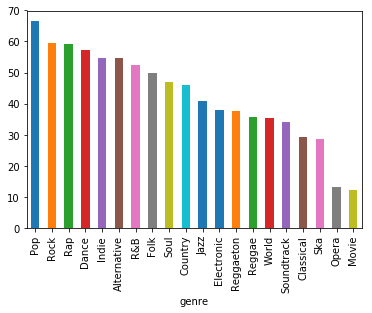

In [27]:
popularity_means = df.groupby(['genre']).mean().sort_values\
                   (by='popularity', ascending=False)
popularity_means['genre'] = popularity_means.index
popularity_means = popularity_means['popularity']
popularity_means.plot.bar()

This graph shows that there is a general decline in mean popularity across genres, suggesting that popularity could be used to help predict a song genre. However popularity is not an acoustic quality, so we cannot use popularity as a means to predict song genre.

#### Bar Chart of Average Danceability Across Genres

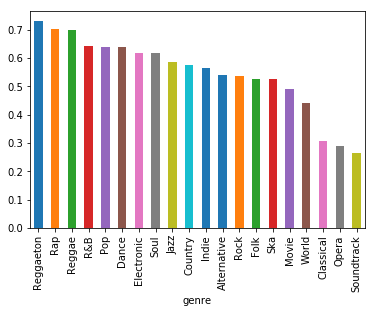

In [28]:
danceability_means = df.groupby(['genre']).mean().sort_values\
                     (by='danceability', ascending=False)
danceability_means['genre'] = danceability_means.index
danceability_means = danceability_means['danceability']
danceability_means.plot.bar()

This graph shows that there is a general decline in mean danceability across genres, suggesting that danceability could be used to help predict a song genre. Here we can see that Reggaeton has the highest danceability compared to Soundtrack which has the lowest danceability.

#### Bar Chart of Average Instrumentalness Across Genres

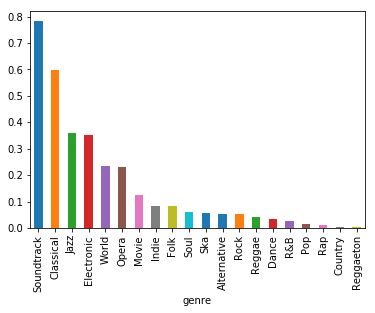

In [29]:
instrumentalness_means = df.groupby(['genre']).mean().sort_values\
                         (by='instrumentalness', ascending=False)
instrumentalness_means['genre'] = instrumentalness_means.index
instrumentalness_means = instrumentalness_means['instrumentalness']
instrumentalness_means.plot.bar()

From this graph we can see that there is a decline in average instrumentalness across the genres. This graph shows that the Soundtrack and Classical genres have significantly higher average instrumentalness than the majority of other genres. It may be possible to use instrumentalness to predict song genre.

#### Bar Chart of Average Liveness Across Genres

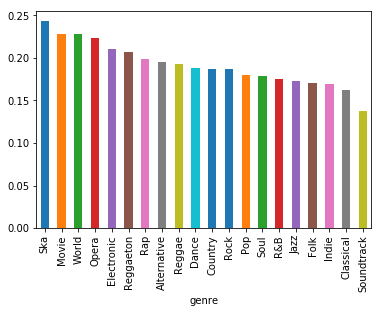

In [30]:
liveness_means = df.groupby(['genre']).mean().sort_values\
                 (by='liveness', ascending=False)
liveness_means['genre'] = liveness_means.index
liveness_means = liveness_means['liveness']
liveness_means.plot.bar()

This bar chart tells us that Comedy has the highest liveness out of the genres, while the remaining genres have about the same liveness. From this we can say that liveness has low potential in being able to predict song genre.

#### Bar Chart of Average Loudness Across Genres

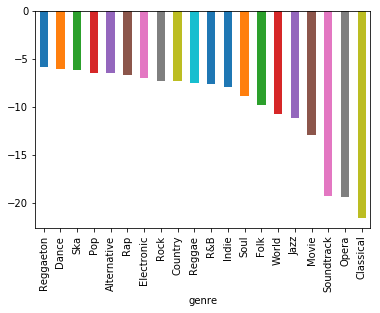

In [31]:
loudness_means = df.groupby(['genre']).mean().sort_values\
                 (by='loudness', ascending=False)
loudness_means['genre'] = loudness_means.index
loudness_means = loudness_means['loudness']
loudness_means.plot.bar()

This graph shows that there is a general decline in mean loudness across genres, suggesting that loudness could be used to help predict a song genre. Here we can see that Reggaeton has the highest loudness compared to Classical which has the lowest loudness.

#### Bar Chart of Average Tempo Across Genres

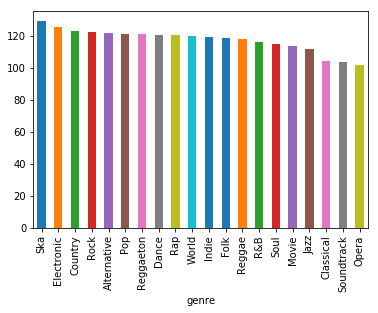

In [32]:
# Plot average tempo across genres
tempo_means = df.groupby(['genre']).mean().sort_values\
              (by='tempo', ascending=False)
tempo_means['genre'] = tempo_means.index
tempo_means = tempo_means['tempo']
tempo_means.plot.bar()

This graph shows that there is a general decline in mean tempo across genre, however the averages are the same between the genres of Blues to Hip Hop, so tempo may not be viable to use when trying to predict song genre.

#### Bar Chart of Average Acousticness Across Genres

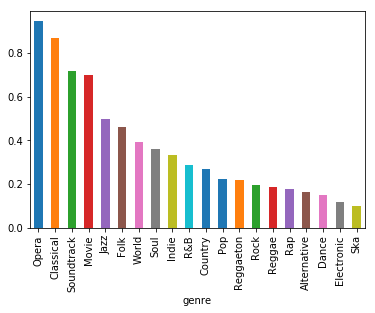

In [33]:
accoustic_means = df.groupby(['genre']).mean().sort_values\
                  (by='acousticness', ascending=False)
accoustic_means['genre'] = accoustic_means.index
acc_means=accoustic_means['acousticness']
acc_means.plot.bar()

From this graph we can see that there is a decline in average acousticness across the genres. Because of this it may be possible to use instrumentalness to predict song genre. Here we can see Opera has the highest acousticness, while Ska has the lowest acousticness.

#### Bar Chart of Average Valence Across Genres

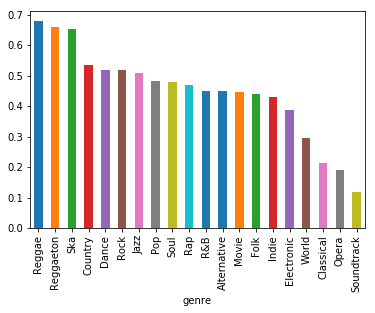

In [34]:
valence_means = df.groupby(['genre']).mean().sort_values\
                (by='valence', ascending=False)
valence_means['genre']=valence_means.index
val_means=valence_means['valence']
val_means.plot.bar()

This graph shows that there is a general decline in mean valence across genre, however the averages are the same between the genres of Rap to Movie, so valence may not be viable to use when trying to predict song genre.

#### Bar Chart of Average Speechiness Across Genres

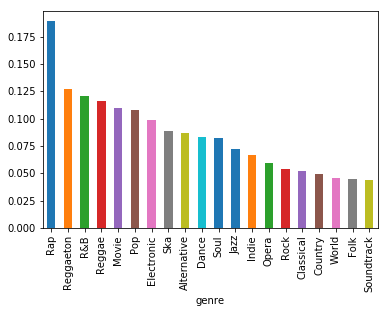

In [35]:
speechiness_means = df.groupby(['genre']).mean().sort_values\
                    (by='speechiness', ascending=False)
speechiness_means['genre']=speechiness_means.index
speech_means=speechiness_means['speechiness']
speech_means.plot.bar()

This bar chart tells us that Comedy has the highest speechiness out of the genres, while the remaining genres have about the same speechiness. From this we can say that speechiness has low potential in being able to predict song genre.

#### Bar Chart of Average Energy Across Genres

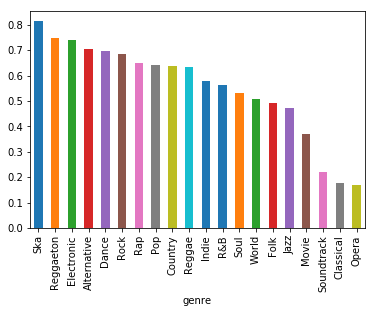

In [36]:
energy_means = df.groupby(['genre']).mean().sort_values\
               (by='energy', ascending=False)
energy_means['genre']=energy_means.index
en_means=energy_means['energy']
en_means.plot.bar()

This graph shows that there is a general decline in mean energy across genre, however the averages are the same between the genres of Blues to Alternative and between Pop to Reggae, so duration may not be viable to use when trying to predict song genre.

### Analysis of Bar Charts of Mean Values of Attributes Across Genres

After plotting the mean values of all attributes across genres we can spot trends between genres. Plots where the average value for an attribute across genres could be used to determine a song's genre, but only if every mean is unique from one another.

From this we have determined that the following attributes have potential for predicting genre: danceability, loudness, acousticness, energy, and instrumentalness. Though we included tempo in our hypothesis, after this portion of exploratory data analysis we determined that tempo is not useful in predicting song genre.

To further test if the above attributes are viable to use to determine a song's genre, we must look closer at their values and distributions.

### Distribution Plots of All Attributes Across Genres

Below we plot the distributions for all attributes across the population. We do this so we can visualize their distributions and determine if they are normal or not.

#### Distribution Plot of All Attributes with Scale from 0.0 to 1.0 in the Population

Text(0.5, 1.0, 'Distribution of Attributes for All Songs')

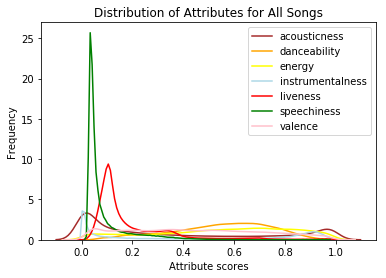

In [37]:
line1 = sns.distplot(df[['acousticness']], bins = 25, hist=False, rug=False, label = 'acousticness', color= 'brown' )
line2 = sns.distplot(df[['danceability']], bins = 25,  hist=False, rug=False, label = 'danceability',color = 'orange')
line3 = sns.distplot(df[['energy']], hist=False, bins = 25,  rug=False, label = 'energy', color = 'yellow')
line4 = sns.distplot(df[['instrumentalness']], bins = 25,  hist=False, rug=False,label = 'instrumentalness', color = 'lightblue')
line5 = sns.distplot(df[['liveness']], bins = 25,  hist=False, rug=False, label = 'liveness', color = 'red')
line6 = sns.distplot(df[['speechiness']], bins = 25,  hist=False, rug=False, label = 'speechiness', color = 'green')
line7 = sns.distplot(df[['valence']], hist=False, bins = 25,  rug=False, label = 'valence',  color = 'pink')

plt.xlabel('Attribute scores')
plt.ylabel('Frequency')
plt.title('Distribution of Attributes for All Songs')

#### Distribution Plot of Loudness in the Population

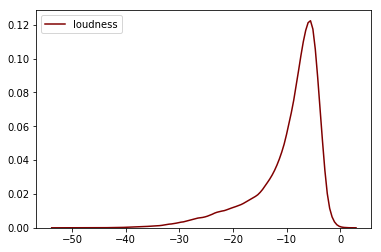

In [38]:
sns.distplot(df[['loudness']], bins = 25, hist=False, rug=False, label = 'loudness', color= 'maroon' )

#### Distribution Plot of Tempo in the Population

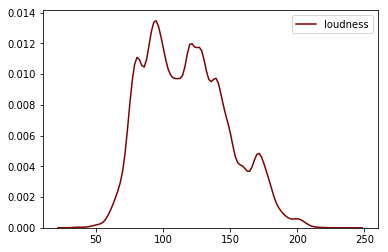

In [39]:
sns.distplot(df[['tempo']], bins = 25, hist=False, rug=False, label = 'loudness', color= 'maroon' )

#### Check If Distributions For Attributes Are Normal

In [40]:
#Checks if the distribution of the "popularity" attribute is normal
k2_pop, p = stats.normaltest(df['popularity'])
alpha = 0.05

if p < alpha:  # null hypothesis: The distribution of the popularity attribute is normal
    print("The null hypothesis that 'The distribution of the popularity attribute is normal'  can be rejected")
else:
    print("The null hypothesis that 'The distribution of the popularity attribute is normal' cannot be rejected")

#Checks if the distribution of the "danceability" attribute is normal
k2, p = stats.normaltest(df['danceability'])
alpha = 0.05

if p < alpha:  # null hypothesis: The distribution of the danceability attribute is normal
    print("The null hypothesis that 'The distribution of the danceability attribute is normal'  can be rejected")
else:
    print("The null hypothesis that 'The distribution of the danceability attribute is normal' cannot be rejected")

#Checks if the distribution of the "instrumentalness" attribute is normal
k2, p = stats.normaltest(df['instrumentalness'])
alpha = 0.05

if p < alpha:  # null hypothesis: The distribution of the instrumentalness attribute is normal
    print("The null hypothesis that 'The distribution of the instrumentalness attribute is normal'  can be rejected")
else:
    print("The null hypothesis that 'The distribution of the instrumentalness attribute is normal' cannot be rejected")
    
#Checks if the distribution of the "liveness" attribute is normal
k2, p = stats.normaltest(df['liveness'])
alpha = 0.05

if p < alpha:  # null hypothesis: The distribution of the liveness attribute is normal
    print("The null hypothesis that 'The distribution of the liveness attribute is normal'  can be rejected")
else:
    print("The null hypothesis that 'The distribution of the liveness attribute is normal' cannot be rejected")
    
#Checks if the distribution of the "liveness" attribute is normal
k2, p = stats.normaltest(df['loudness'])
alpha = 0.05

if p < alpha:  # null hypothesis: The distribution of the loudness attribute is normal
    print("The null hypothesis that 'The distribution of the loudness attribute is normal'  can be rejected")
else:
    print("The null hypothesis that 'The distribution of the loudness attribute is normal' cannot be rejected")
    
#Checks if the distribution of the "speechiness" attribute is normal
k2, p = stats.normaltest(df['speechiness'])
alpha = 0.05

if p < alpha:  # null hypothesis: The distribution of the speechiness attribute is normal
    print("The null hypothesis that 'The distribution of the speechiness attribute is normal'  can be rejected")
else:
    print("The null hypothesis that 'The distribution of the speechiness attribute is normal' cannot be rejected")
    
#Checks if the distribution of the "valence" attribute is normal
k2, p = stats.normaltest(df['valence'])
alpha = 0.05

if p < alpha:  # null hypothesis: The distribution of the valence attribute is normal
    print("The null hypothesis that 'The distribution of the valence attribute is normal'  can be rejected")
else:
    print("The null hypothesis that 'The distribution of the valence attribute is normal' cannot be rejected")

#Checks if the distribution of the "tempo" attribute is normal
k2, p = stats.normaltest(df['tempo'])
alpha = 0.05

if p < alpha:  # null hypothesis: The distribution of the tempo attribute is normal
    print("The null hypothesis that 'The distribution of the tempo attribute is normal'  can be rejected")
else:
    print("The null hypothesis that 'The distribution of the tempo attribute is normal' cannot be rejected")

#Checks if the distribution of the "tempo" attribute is normal
k2, p = stats.normaltest(df['tempo'])
alpha = 0.05

if p < alpha:  # null hypothesis: The distribution of the acousticness attribute is normal
    print("The null hypothesis that 'The distribution of the acousticness attribute is normal'  can be rejected")
else:
    print("The null hypothesis that 'The distribution of the acousticness attribute is normal' cannot be rejected")

    

The null hypothesis that 'The distribution of the popularity attribute is normal'  can be rejected
The null hypothesis that 'The distribution of the danceability attribute is normal'  can be rejected
The null hypothesis that 'The distribution of the instrumentalness attribute is normal'  can be rejected
The null hypothesis that 'The distribution of the liveness attribute is normal'  can be rejected
The null hypothesis that 'The distribution of the loudness attribute is normal'  can be rejected
The null hypothesis that 'The distribution of the speechiness attribute is normal'  can be rejected
The null hypothesis that 'The distribution of the valence attribute is normal'  can be rejected
The null hypothesis that 'The distribution of the tempo attribute is normal'  can be rejected
The null hypothesis that 'The distribution of the acousticness attribute is normal'  can be rejected


From these assertions we know that none of the distributions for any of the attributes across the genres are normal. This is because we reject the null hypothesis that the distribution is normal. Now that we know this, we can plot the distribution plots of the five attributes that we think have the ability to predict song genre (acousticness, danceability, loudness, energy).

### Distribution Plots of All Attributes Across Genres


In the last section we determined which attributes have potential in predicting song genre by graphing the mean values of each attribute across all of the genres. We cannot assume that these attributes are correct in being able to predict song genre with only the mean, so we need to look at their distributions between genres.

#### Distribution Plot of Acousticness of All Songs in Each Genre

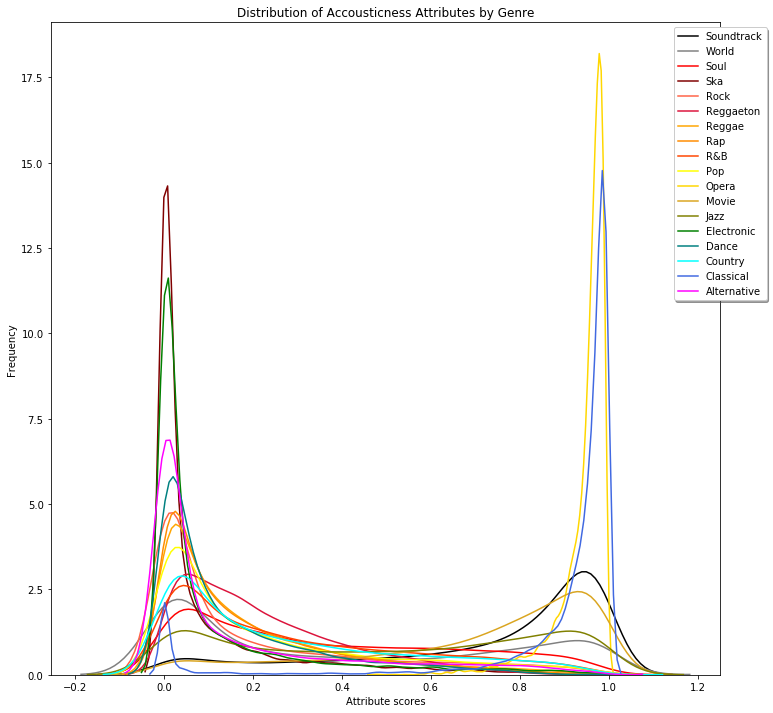

In [41]:
sns.distplot(df_Soundtrack[['acousticness']], bins = 25,   hist=False, rug=False, label = 'Soundtrack', color= 'black' )
sns.distplot(df_World[['acousticness']], bins = 25,   hist=False, rug=False, label = 'World', color= 'grey' )
sns.distplot(df_Soul[['acousticness']], bins = 25,   hist=False, rug=False, label = 'Soul', color= 'red' )
sns.distplot(df_Ska[['acousticness']], bins = 25,   hist=False, rug=False, label = 'Ska', color= 'maroon' )
sns.distplot(df_Rock[['acousticness']], bins = 25,   hist=False, rug=False, label = 'Rock', color= 'tomato' )
sns.distplot(df_Reggaeton[['acousticness']], bins = 25,   hist=False, rug=False, label = 'Reggaeton', color= 'crimson' )
sns.distplot(df_Reggae[['acousticness']], bins = 25,   hist=False, rug=False, label = 'Reggae', color= 'orange' )
sns.distplot(df_Rap[['acousticness']], bins = 25,   hist=False, rug=False, label = 'Rap', color= 'darkorange' )
sns.distplot(df_RandB[['acousticness']], bins = 25,   hist=False, rug=False, label = 'R&B', color= 'orangered' )
sns.distplot(df_Pop[['acousticness']], bins = 25,   hist=False, rug=False, label = 'Pop', color= 'yellow' )
sns.distplot(df_Opera[['acousticness']], bins = 25,   hist=False, rug=False, label = 'Opera', color= 'gold' )
sns.distplot(df_Movie[['acousticness']], bins = 25,   hist=False, rug=False, label = 'Movie', color= 'goldenrod' )
sns.distplot(df_Jazz [['acousticness']], bins = 25,   hist=False, rug=False, label = 'Jazz ', color= 'olive' )
sns.distplot(df_Electronic[['acousticness']], bins = 25,   hist=False, rug=False, label = 'Electronic', color= 'green' )
sns.distplot(df_Dance[['acousticness']], bins = 25,   hist=False, rug=False, label = 'Dance', color= 'teal' )
sns.distplot(df_Country[['acousticness']], bins = 25,   hist=False, rug=False, label = 'Country', color= 'cyan' )
sns.distplot(df_Classical[['acousticness']], bins = 25,   hist=False, rug=False, label = 'Classical', color= 'royalblue' )
sns.distplot(df_Alternative[['acousticness']], bins = 25,   hist=False, rug=False, label = 'Alternative', color= 'magenta' )


plt.xlabel('Attribute scores')
plt.ylabel('Frequency')
plt.title('Distribution of Accousticness Attributes by Genre')
plt.legend(loc='upper center', bbox_to_anchor=(1, 1), shadow=True, ncol=1)
fig = plt.gcf()
fig.set_size_inches(12,12)

From this plot we can see that the distributions of acousticness are not similar. The attributes have different frequencies across genres which indicates that their differences are signficant enough to differentiate from one another. 

We determine that acousticness can be used to predict song genre.

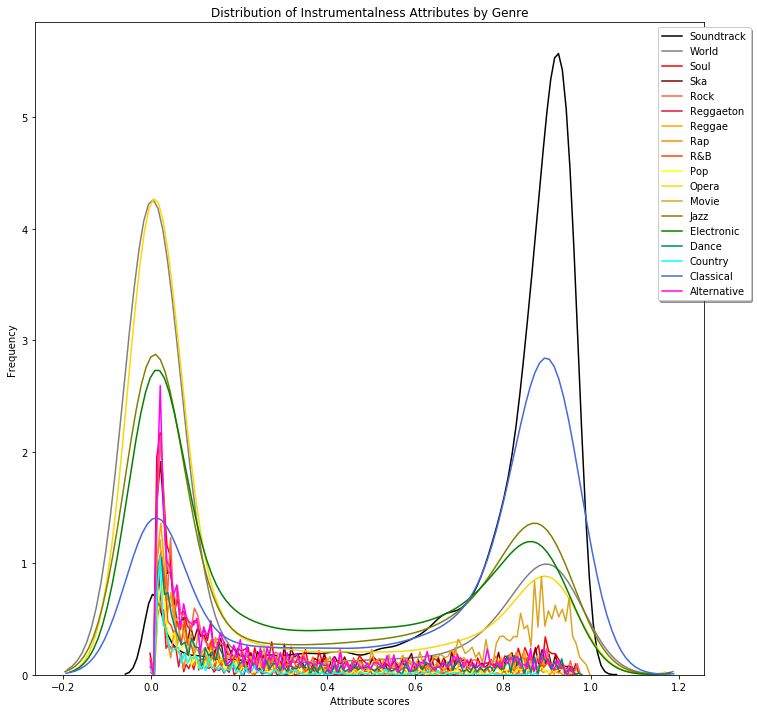

In [42]:
#plots the distribution of the instrumentalness attributes of all songs in each Genre
sns.distplot(df_Soundtrack[['instrumentalness']], bins = 25,   hist=False, rug=False, label = 'Soundtrack', color= 'black' )
sns.distplot(df_World[['instrumentalness']], bins = 25,   hist=False, rug=False, label = 'World', color= 'grey' )
sns.distplot(df_Soul[['instrumentalness']], bins = 25,   hist=False, rug=False, label = 'Soul', color= 'red' )
sns.distplot(df_Ska[['instrumentalness']], bins = 25,   hist=False, rug=False, label = 'Ska', color= 'maroon' )
sns.distplot(df_Rock[['instrumentalness']], bins = 25,   hist=False, rug=False, label = 'Rock', color= 'tomato' )
sns.distplot(df_Reggaeton[['instrumentalness']], bins = 25,   hist=False, rug=False, label = 'Reggaeton', color= 'crimson' )
sns.distplot(df_Reggae[['instrumentalness']], bins = 25,   hist=False, rug=False, label = 'Reggae', color= 'orange' )
sns.distplot(df_Rap[['instrumentalness']], bins = 25,   hist=False, rug=False, label = 'Rap', color= 'darkorange' )
sns.distplot(df_RandB[['instrumentalness']], bins = 25,   hist=False, rug=False, label = 'R&B', color= 'orangered' )
sns.distplot(df_Pop[['instrumentalness']], bins = 25,   hist=False, rug=False, label = 'Pop', color= 'yellow' )
sns.distplot(df_Opera[['instrumentalness']], bins = 25,   hist=False, rug=False, label = 'Opera', color= 'gold' )
sns.distplot(df_Movie[['instrumentalness']], bins = 25,   hist=False, rug=False, label = 'Movie', color= 'goldenrod' )
sns.distplot(df_Jazz [['instrumentalness']], bins = 25,   hist=False, rug=False, label = 'Jazz ', color= 'olive' )
sns.distplot(df_Electronic[['instrumentalness']], bins = 25,   hist=False, rug=False, label = 'Electronic', color= 'green' )
sns.distplot(df_Dance[['instrumentalness']], bins = 25,   hist=False, rug=False, label = 'Dance', color= 'teal' )
sns.distplot(df_Country[['instrumentalness']], bins = 25,   hist=False, rug=False, label = 'Country', color= 'cyan' )
sns.distplot(df_Classical[['instrumentalness']], bins = 25,   hist=False, rug=False, label = 'Classical', color= 'royalblue' )
sns.distplot(df_Alternative[['instrumentalness']], bins = 25,   hist=False, rug=False, label = 'Alternative', color= 'magenta' )

plt.xlabel('Attribute scores')
plt.ylabel('Frequency')
plt.title('Distribution of Instrumentalness Attributes by Genre')
plt.legend(loc='upper center', bbox_to_anchor=(1, 1), shadow=True, ncol=1)
fig = plt.gcf()
fig.set_size_inches(12,12)

In this graph we can also see that the distributions of instrumentalness are not similar. The attributes' frequencies and distributions vary greatly across genres which indicates that their differences are signficant enough to differentiate from one another. 

We determine that acousticness can be used to predict song genre.

#### Distribution Plot of Danceability of All Songs in Each Genre

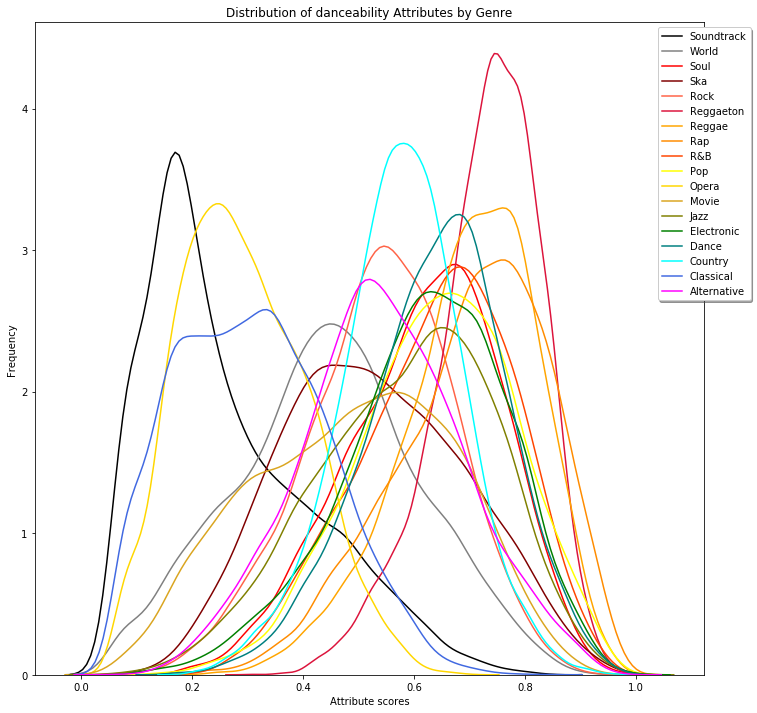

In [43]:
sns.distplot(df_Soundtrack[['danceability']], bins = 25,   hist=False, rug=False, label = 'Soundtrack', color= 'black' )
sns.distplot(df_World[['danceability']], bins = 25,   hist=False, rug=False, label = 'World', color= 'grey' )
sns.distplot(df_Soul[['danceability']], bins = 25,   hist=False, rug=False, label = 'Soul', color= 'red' )
sns.distplot(df_Ska[['danceability']], bins = 25,   hist=False, rug=False, label = 'Ska', color= 'maroon' )
sns.distplot(df_Rock[['danceability']], bins = 25,   hist=False, rug=False, label = 'Rock', color= 'tomato' )
sns.distplot(df_Reggaeton[['danceability']], bins = 25,   hist=False, rug=False, label = 'Reggaeton', color= 'crimson' )
sns.distplot(df_Reggae[['danceability']], bins = 25,   hist=False, rug=False, label = 'Reggae', color= 'orange' )
sns.distplot(df_Rap[['danceability']], bins = 25,   hist=False, rug=False, label = 'Rap', color= 'darkorange' )
sns.distplot(df_RandB[['danceability']], bins = 25,   hist=False, rug=False, label = 'R&B', color= 'orangered' )
sns.distplot(df_Pop[['danceability']], bins = 25,   hist=False, rug=False, label = 'Pop', color= 'yellow' )
sns.distplot(df_Opera[['danceability']], bins = 25,   hist=False, rug=False, label = 'Opera', color= 'gold' )
sns.distplot(df_Movie[['danceability']], bins = 25,   hist=False, rug=False, label = 'Movie', color= 'goldenrod' )
sns.distplot(df_Jazz [['danceability']], bins = 25,   hist=False, rug=False, label = 'Jazz ', color= 'olive' )
sns.distplot(df_Electronic[['danceability']], bins = 25,   hist=False, rug=False, label = 'Electronic', color= 'green' )
sns.distplot(df_Dance[['danceability']], bins = 25,   hist=False, rug=False, label = 'Dance', color= 'teal' )
sns.distplot(df_Country[['danceability']], bins = 25,   hist=False, rug=False, label = 'Country', color= 'cyan' )
sns.distplot(df_Classical[['danceability']], bins = 25,   hist=False, rug=False, label = 'Classical', color= 'royalblue' )
sns.distplot(df_Alternative[['danceability']], bins = 25,   hist=False, rug=False, label = 'Alternative', color= 'magenta' )

plt.xlabel('Attribute scores')
plt.ylabel('Frequency')
plt.title('Distribution of danceability Attributes by Genre')
plt.legend(loc='upper center', bbox_to_anchor=(1, 1), shadow=True, ncol=1)
fig = plt.gcf()
fig.set_size_inches(12,12)

In this graph we can also see that the distributions of danceability are not similar. The attributes' frequencies and distributions vary greatly across genres which indicates that their differences are signficant enough to differentiate from one another. 

We determine that danceability can be used to predict song genre.

#### Distribution Plot of Energy of All Songs in Each Genre

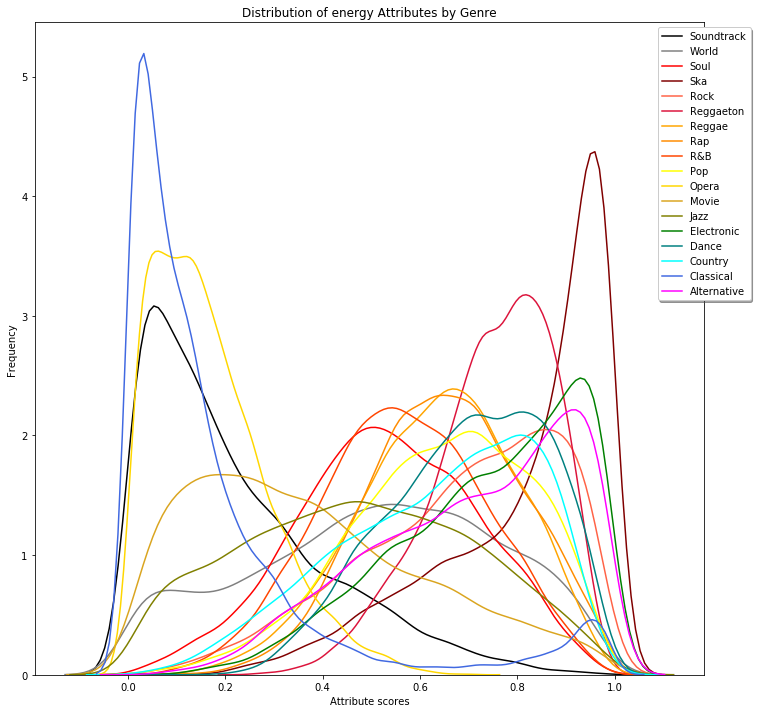

In [44]:
sns.distplot(df_Soundtrack[['energy']], bins = 25,   hist=False, rug=False, label = 'Soundtrack', color= 'black' )
sns.distplot(df_World[['energy']], bins = 25,   hist=False, rug=False, label = 'World', color= 'grey' )
sns.distplot(df_Soul[['energy']], bins = 25,   hist=False, rug=False, label = 'Soul', color= 'red' )
sns.distplot(df_Ska[['energy']], bins = 25,   hist=False, rug=False, label = 'Ska', color= 'maroon' )
sns.distplot(df_Rock[['energy']], bins = 25,   hist=False, rug=False, label = 'Rock', color= 'tomato' )
sns.distplot(df_Reggaeton[['energy']], bins = 25,   hist=False, rug=False, label = 'Reggaeton', color= 'crimson' )
sns.distplot(df_Reggae[['energy']], bins = 25,   hist=False, rug=False, label = 'Reggae', color= 'orange' )
sns.distplot(df_Rap[['energy']], bins = 25,   hist=False, rug=False, label = 'Rap', color= 'darkorange' )
sns.distplot(df_RandB[['energy']], bins = 25,   hist=False, rug=False, label = 'R&B', color= 'orangered' )
sns.distplot(df_Pop[['energy']], bins = 25,   hist=False, rug=False, label = 'Pop', color= 'yellow' )
sns.distplot(df_Opera[['energy']], bins = 25,   hist=False, rug=False, label = 'Opera', color= 'gold' )
sns.distplot(df_Movie[['energy']], bins = 25,   hist=False, rug=False, label = 'Movie', color= 'goldenrod' )
sns.distplot(df_Jazz [['energy']], bins = 25,   hist=False, rug=False, label = 'Jazz ', color= 'olive' )
sns.distplot(df_Electronic[['energy']], bins = 25,   hist=False, rug=False, label = 'Electronic', color= 'green' )
sns.distplot(df_Dance[['energy']], bins = 25,   hist=False, rug=False, label = 'Dance', color= 'teal' )
sns.distplot(df_Country[['energy']], bins = 25,   hist=False, rug=False, label = 'Country', color= 'cyan' )
sns.distplot(df_Classical[['energy']], bins = 25,   hist=False, rug=False, label = 'Classical', color= 'royalblue' )
sns.distplot(df_Alternative[['energy']], bins = 25,   hist=False, rug=False, label = 'Alternative', color= 'magenta' )

plt.xlabel('Attribute scores')
plt.ylabel('Frequency')
plt.title('Distribution of energy Attributes by Genre')
plt.legend(loc='upper center', bbox_to_anchor=(1, 1), shadow=True, ncol=1)
fig = plt.gcf()
fig.set_size_inches(12,12)

In this graph we can also see that the distributions of energy are not similar. The attributes' frequencies and distributions vary greatly across genres which indicates that their differences are signficant enough to differentiate from one another. 

We determine that energy can be used to predict song genre.

#### Distribution Plot of Loudness of All Songs in Each Genre

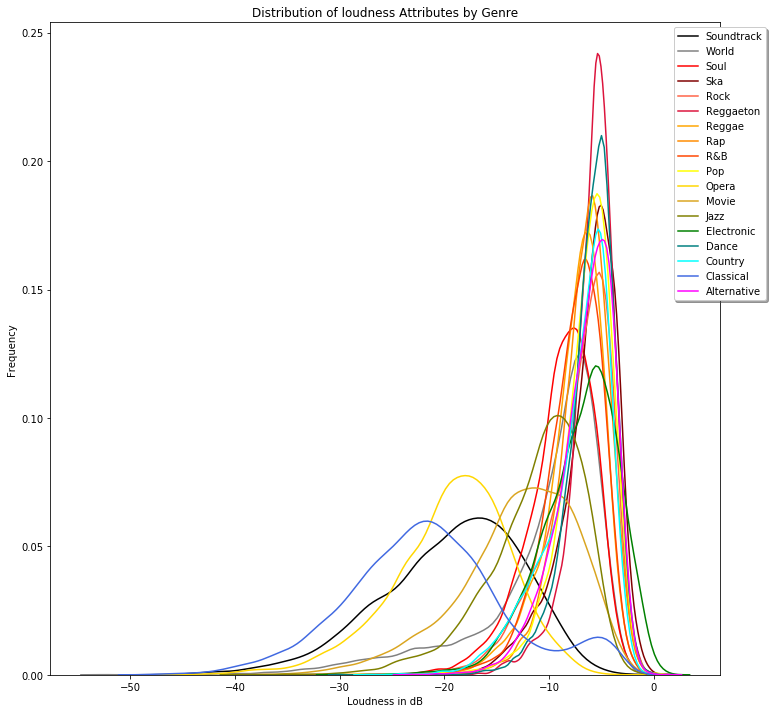

In [45]:
sns.distplot(df_Soundtrack[['loudness']], bins = 25,   hist=False, rug=False, label = 'Soundtrack', color= 'black' )
sns.distplot(df_World[['loudness']], bins = 25,   hist=False, rug=False, label = 'World', color= 'grey' )
sns.distplot(df_Soul[['loudness']], bins = 25,   hist=False, rug=False, label = 'Soul', color= 'red' )
sns.distplot(df_Ska[['loudness']], bins = 25,   hist=False, rug=False, label = 'Ska', color= 'maroon' )
sns.distplot(df_Rock[['loudness']], bins = 25,   hist=False, rug=False, label = 'Rock', color= 'tomato' )
sns.distplot(df_Reggaeton[['loudness']], bins = 25,   hist=False, rug=False, label = 'Reggaeton', color= 'crimson' )
sns.distplot(df_Reggae[['loudness']], bins = 25,   hist=False, rug=False, label = 'Reggae', color= 'orange' )
sns.distplot(df_Rap[['loudness']], bins = 25,   hist=False, rug=False, label = 'Rap', color= 'darkorange' )
sns.distplot(df_RandB[['loudness']], bins = 25,   hist=False, rug=False, label = 'R&B', color= 'orangered' )
sns.distplot(df_Pop[['loudness']], bins = 25,   hist=False, rug=False, label = 'Pop', color= 'yellow' )
sns.distplot(df_Opera[['loudness']], bins = 25,   hist=False, rug=False, label = 'Opera', color= 'gold' )
sns.distplot(df_Movie[['loudness']], bins = 25,   hist=False, rug=False, label = 'Movie', color= 'goldenrod' )
sns.distplot(df_Jazz [['loudness']], bins = 25,   hist=False, rug=False, label = 'Jazz ', color= 'olive' )
sns.distplot(df_Electronic[['loudness']], bins = 25,   hist=False, rug=False, label = 'Electronic', color= 'green' )
sns.distplot(df_Dance[['loudness']], bins = 25,   hist=False, rug=False, label = 'Dance', color= 'teal' )
sns.distplot(df_Country[['loudness']], bins = 25,   hist=False, rug=False, label = 'Country', color= 'cyan' )
sns.distplot(df_Classical[['loudness']], bins = 25,   hist=False, rug=False, label = 'Classical', color= 'royalblue' )
sns.distplot(df_Alternative[['loudness']], bins = 25,   hist=False, rug=False, label = 'Alternative', color= 'magenta' )

plt.xlabel('Loudness in dB')
plt.ylabel('Frequency')
plt.title('Distribution of loudness Attributes by Genre')
plt.legend(loc='upper center', bbox_to_anchor=(1, 1), shadow=True, ncol=1)
fig = plt.gcf()
fig.set_size_inches(12,12)

In this graph we can also see that the distributions of loudness are similar. The attributes' frequencies take the same shape and overlap around -5dB. Because of this there is not enough significant difference between the distributions of each genre.

We determine that loudness cannot be used to predict song genre.

### Analysis of Bar Charts of Mean Values of Attributes Across Genres

From plotting the distributions of our predicted attributes across genres we have determined that danceability, instrumentalness, acousticness, and energy can be used to determine song genre. This is because their distributions differed between genres, indicating that there is enough variance between genres to create boundaries.

The loudness attribute's distribution was too similar across genres so we assert that loudness cannot be used to determine song genre.

### Analysis

After exploring our data we have narrowed down the audio attributes to four attributes that we believe are capable of predicting a song's genre. These four attributes have different enough distributions such that the trends across each genre are distinct. From here we can attempt building a model that can predict a song's genre using these four attributes: danceability, instrumentalness, acousticness, energy.

### Polyfit Prediction Energy-Loudness

In [46]:
df_2 = df.copy()
df_2= df_2.drop(['genre', 'artist_name','track_name','track_id'], axis=1)
df_2.head()

,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,21.0,0.986,0.313,0.23100,0.000431,0.0964,-14.287,0.0547,86.001,0.0886
1,18.0,0.972,0.360,0.20100,0.028000,0.1330,-19.794,0.0581,131.798,0.3690
2,10.0,0.935,0.168,0.47000,0.020400,0.3630,-8.415,0.0383,75.126,0.0696
3,17.0,0.961,0.250,0.00605,0.000000,0.1200,-33.440,0.0480,76.493,0.0380
4,19.0,0.985,0.142,0.05800,0.146000,0.0969,-23.625,0.0493,172.935,0.0382


In [47]:
df_2 = df_2.dropna(axis = 0, how ='any')

df_2[df_2.isnull().any(axis=1)]

,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence


In [48]:

#df_2.drop(["energy1"], axis=1)
df_2.loc[:,'popularity10'] = df_2['popularity']
df_2.loc[:,'energy10'] = df_2['energy']
df_2.loc[:,"popularity10"]= df_2["popularity10"].replace(0,1 )
df_2.loc[:,"energy10"]= df_2["energy10"].replace(0, 1 )

 

df_2.head()

,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity10,energy10
0,21.0,0.986,0.313,0.23100,0.000431,0.0964,-14.287,0.0547,86.001,0.0886,21.0,0.23100
1,18.0,0.972,0.360,0.20100,0.028000,0.1330,-19.794,0.0581,131.798,0.3690,18.0,0.20100
2,10.0,0.935,0.168,0.47000,0.020400,0.3630,-8.415,0.0383,75.126,0.0696,10.0,0.47000
3,17.0,0.961,0.250,0.00605,0.000000,0.1200,-33.440,0.0480,76.493,0.0380,17.0,0.00605
4,19.0,0.985,0.142,0.05800,0.146000,0.0969,-23.625,0.0493,172.935,0.0382,19.0,0.05800


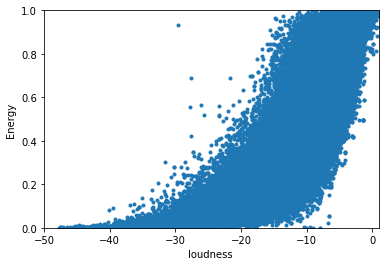

In [49]:
f, ax = plt.subplots()
ax.plot(df_2.loudness, df_2.energy10 , '.')
plt.xlabel('loudness '); plt.xlim([-50, 1 ]);
plt.ylabel('Energy '); plt.ylim([0, 1]);

In [50]:
a, b = np.polyfit(df_2.loudness, df_2.energy, 1)

new_loudness = -14.287
pred_energy = a * new_loudness + b 
print('Predicted weight for a new data point, loudness  is', pred_energy)

Predicted weight for a new data point, loudness  is 0.393549952473


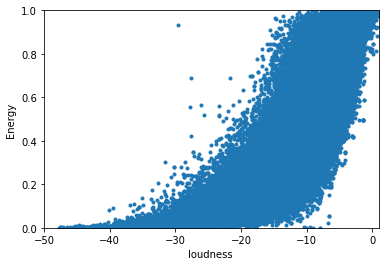

In [51]:
ax.plot(pred_energy, new_loudness, '.r')
f

In [52]:
df_2['energy'].where(df['loudness'] == -14.287)[0]

0.23100000000000001

In [53]:
actual_energy = 0.231
error = actual_energy - pred_energy

print('The (absolute) error of our prediction is', str(abs(error),))

The (absolute) error of our prediction is 0.162549952473


### Correlation

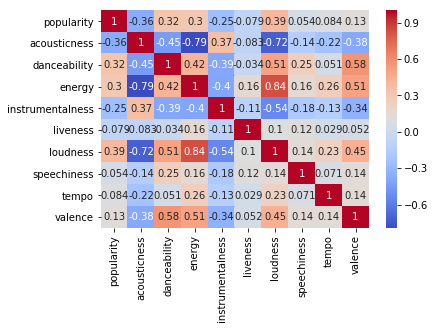

In [54]:
# Creating heatmap of correlation between each attribute
# Cells with more solid color will be those with the strongest correlation
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

From this correlation table, we can see how different attributes of songs are correlated to each other. Popularity is most highly correlated with loudness with r=0.39. This indicates a positive relationship between popularity and loudness. This may be due to the fact that louder songs are more easily heard, thus reaching a larger audience and becoming more popular. 

The largest r value in the table besides the attributes that are correlated to themselves is between energy and loudness with r=0.84. This indicates a positive relationship between the two. This could be explained as songs with higher energy, which is an attribute as defined by Spotify's API and algorithms, are louder than songs with less energy. It is also possible that the way energy is determined is on spikes in audio, meaning that louder songs will be defined as having higher energy.

These are just a few of the correlations between attributes within this dataset.

In [55]:
X = df['danceability'].values
y = df['energy'].values

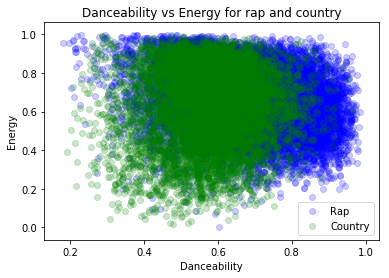

In [56]:
# looking at distinctions of attributes between hip-hop and rap genres
genre1 = 'Rap'
genre2 = 'Country'
plt.scatter(df.danceability[df.genre==genre1], df.energy[df.genre==genre1],
           c='blue', alpha=0.2, label=genre1)
plt.scatter(df.danceability[df.genre==genre2], df.energy[df.genre==genre2],
           c='green', alpha=0.2, label=genre2)

plt.title('Danceability vs Energy for rap and country')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.legend()
plt.show()

This graph shows a slight difference between danceability and energy between the rap and indie genre. However, this is not optimal due to the large amount of attributes there are to compare.

Comparing the various number of attributes for each song is difficult due to how many there are (10 attributes). Thus, we believe it to be necessary to reduce these dimensions using Principal Component Analysis. This will make it easier to compare different genres.

### Dimensionality Reduction

In [57]:
df.shape

(184190, 14)

In [58]:
from sklearn.preprocessing import StandardScaler

attributes = ['popularity', 'acousticness', 'danceability', 'energy',
              'instrumentalness', 'liveness', 'loudness', 'speechiness', 
              'tempo', 'valence']
x = df.loc[:,attributes].values # Gets all of the song's quantitative attributes
y = df.loc[:,['genre']].values # Gets the genres for each song

x = StandardScaler().fit_transform(x) # Scales the attributes to standardize it

We have to standardize the variables before performing Principal Component Analysis or else some variables may dominate over others due to their scale. For example, Popularity is on a scale from 0-100 while attributes such as danceability and energy are on a scale of 0.0 to 1.0. If we did not do this, we would face problems with biased results from attributes like Popularity.

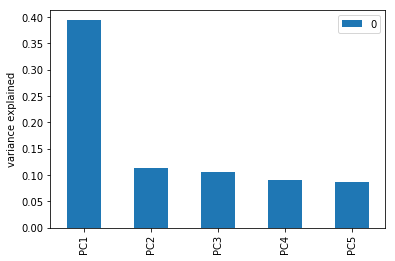

In [59]:
pca = PCA(n_components=5)
x_pca_fit = pca.fit(x)

var_exp = pd.DataFrame(x_pca_fit.explained_variance_ratio_,
                      ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
var_exp.plot.bar()
plt.ylabel('variance explained')
plt.show()

In [60]:
print(x_pca_fit.explained_variance_ratio_)

[ 0.39361588  0.11371539  0.10639414  0.09124485  0.08673072]


We decided to only choose the first two principal components as we are trying to reduce the attributes down to only two variables so a linear regression can be created. As a result, our PCs only explain roughly 50% of the variance. This is a drawback but this allows us to further analyze the data by reducing the dimensions so we believe it is a necessary step.

In [61]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['pc1', 'pc2'])

In [62]:
finalDf = pd.concat([principalDf, df[['genre']]], axis = 1)
finalDf.dropna(axis=0, inplace=True)

In [63]:
finalDf['genre'].value_counts()

Rap            12417
Indie           9543
Pop             9386
Electronic      9377
Alternative     9353
Folk            9299
Classical       9256
R&B             8992
Reggaeton       8927
Reggae          8771
Country         8664
Dance           8577
Ska             7816
Jazz            6308
Opera           5802
Rock            2991
Soul            2424
Soundtrack      2318
Name: genre, dtype: int64

An issue with dimensionality reduction is that there may be a loss of data. We can see that for Rock, Soul, and Soundtrack, songs have been removed due to having null values in the PCA. This may be due to our scaling transformation earlier or it may be a result of calculating our principal components.

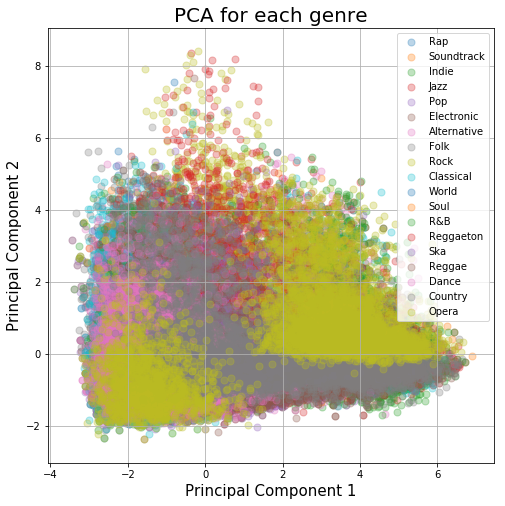

In [64]:
import random
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA for each genre', fontsize = 20)

genres = ['Rap', 'Soundtrack', 'Indie', 'Jazz', 'Pop', 'Electronic',
          'Alternative', 'Folk', 'Rock', 'Classical', 'World', 'Soul',
          'R&B', 'Reggaeton', 'Ska', 'Reggae', 'Dance', 'Country', 'Opera']
colors = []
for i in range(19):
    colors.append('%06X' % random.randint(0, 0xFFFFFF))
    

for target, color in zip(genres,colors):
    indicesToKeep = finalDf['genre'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pc1']
               , finalDf.loc[indicesToKeep, 'pc2']
               , alpha=0.3
               , s = 50)
ax.legend(genres)
ax.grid()

By graphing all of the songs by Principal Components 1 and 2, we can see distinct regions where genres exist. There is a large amount of overlap due to the amount of genres in the graph but we should be able to get a better idea of the distinction between genres by narrowing down the genres we look at in a single graph.

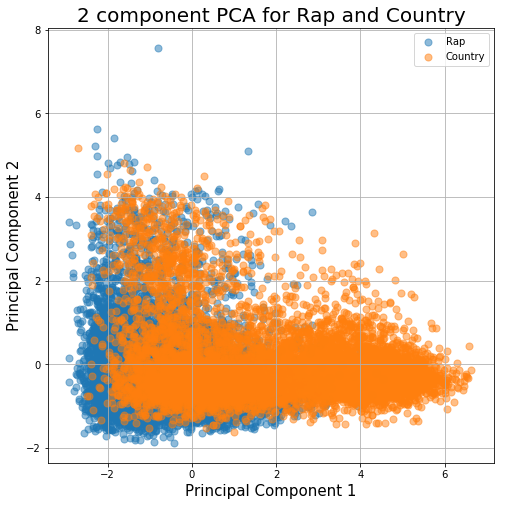

In [65]:
import random
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA for Rap and Country', fontsize = 20)

genres = ['Rap', 'Country']
colors = []
for i in range(19):
    colors.append('%06X' % random.randint(0, 0xFFFFFF))
    

for target, color in zip(genres,colors):
    indicesToKeep = finalDf['genre'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pc1']
               , finalDf.loc[indicesToKeep, 'pc2']
               , alpha=0.5
               , s = 50)
ax.legend(genres)
ax.grid()

By reducing the dimensions of each song to two principal components, we can better visualize the difference between songs in genres based on their attributes. In comparing rap and country, we can see definite distinctions between the two with overlap is specific areas. These areas may be defined as where genres are blurred and songs incorporate similar techniques

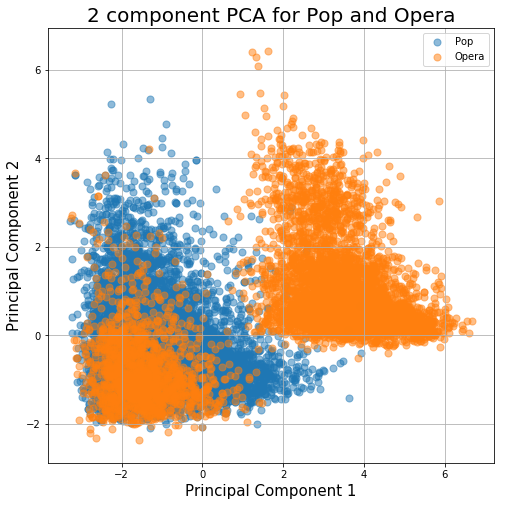

In [66]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA for Pop and Opera', fontsize = 20)

genres = ['Pop', 'Opera']
colors = []
for i in range(19):
    colors.append('%06X' % random.randint(0, 0xFFFFFF))
    

for target, color in zip(genres,colors):
    indicesToKeep = finalDf['genre'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pc1']
               , finalDf.loc[indicesToKeep, 'pc2']
               , alpha=0.5
               , s = 50)
ax.legend(genres)
ax.grid()

In [67]:
pop_indices = finalDf['genre'] == 'Pop'
pop_pca = finalDf.loc[pop_indices]
print(pop_pca.corr())

opera_indices = finalDf['genre'] == 'Opera'
opera_pca = finalDf.loc[opera_indices]
print(opera_pca.corr())

          pc1       pc2
pc1  1.000000 -0.197528
pc2 -0.197528  1.000000
          pc1       pc2
pc1  1.000000  0.479181
pc2  0.479181  1.000000


In [68]:
outcome, predictors = patsy.dmatrices('pc2 ~ pc1', pop_pca)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    pc2   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     381.0
Date:                Wed, 12 Jun 2019   Prob (F-statistic):           3.32e-83
Time:                        23:03:12   Log-Likelihood:                -12832.
No. Observations:                9386   AIC:                         2.567e+04
Df Residuals:                    9384   BIC:                         2.568e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5622      0.014    -39.465      0.0

In [69]:
outcome, predictors = patsy.dmatrices('pc2 ~ pc1', opera_pca)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    pc2   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     1729.
Date:                Wed, 12 Jun 2019   Prob (F-statistic):               0.00
Time:                        23:03:12   Log-Likelihood:                -8850.4
No. Observations:                5802   AIC:                         1.770e+04
Df Residuals:                    5800   BIC:                         1.772e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0036      0.020      0.181      0.8

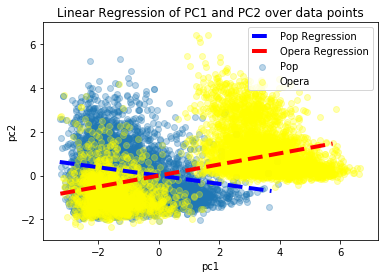

In [70]:
plt.scatter(pop_pca['pc1'], pop_pca['pc2'], alpha=0.3, 
            label='Pop');
plt.scatter(opera_pca['pc1'], opera_pca['pc2'], alpha=0.3, 
            color='yellow', label='Opera');

# Generate and plot the model fit line
xs = np.arange(pop_pca['pc1'].min(), pop_pca['pc1'].max())
ys = -0.1898 * xs # value taken from pop summary stats above
plt.plot(xs, ys, '--k', linewidth=4, label='Pop Regression', color='blue')

xs = np.arange(opera_pca['pc1'].min(), opera_pca['pc1'].max())
ys = 0.2545 * xs # value taken from opera summary stats above
plt.plot(xs, ys, '--k', linewidth=4, label='Opera Regression', color='red')

plt.xlabel('pc1')
plt.ylabel('pc2')
plt.title('Linear Regression of PC1 and PC2 over data points')
plt.legend();

By graphing the linear regression of the separate genres (Pop and Opera) we can see a difference between the two. Where the two lines overlap is where we see that the data points have an overlap. This is significant as it marks where the genres have similar principal components. This may be where genres are blurred and the songs between different genres are the most similar. 

This is just one example of the difference between genres after applying dimesionality reduction. There are bound to be many other genres that have much smaller or bigger differences.

### SVM 

In [71]:
#create a variable that is the same as df so we can modify it
e_df = df

#create a df with only genre of a song, the index, instrumentalness, 
# accousticness, danceability, energy 
e_df = e_df.drop(columns=['artist_name', 'track_name', 'track_id', 
                          'popularity', 'liveness', 'loudness', 'speechiness'])
#removes all songs with genre acapella
# updated because acapella genre removed in data cleaning section
#e_df = e_df[e_df.genre != 'A Capella']


def convert_label(label):
    if label == 'Alternative':
        output = 1.0
    elif label == 'Classical':
        output = 2.0
    elif label == 'Country':
        output = 3.0
    elif label == 'Dance':
        output = 4.0
    elif label == 'Electronic':
        output = 5.0
    elif label == 'Folk':
        output = 6.0
    elif label == 'Indie':
        output = 7.0
    elif label == 'Jazz':
        output = 8.0
    elif label == 'Movie':
        output = 9.0
    elif label == 'Opera':
        output = 10.0
    elif label == 'Pop':
        output = 11.0
    elif label == 'R&B':
        output = 12.0
    elif label == 'Rap':
        output = 13.0
    elif label == 'Reggae':
        output = 14.0
    elif label == 'Reggaeton':
        output = 15.0
    elif label == 'Rock':
        output = 16.0
    elif label == 'Ska':
        output = 17.0
    elif label == 'Soul':
        output = 18.0
    elif label == 'Soundtrack':
        output = 19.0
    elif label == 'World':
        output = 20.0
    else:
        output = label
        
    return output

e_df['genre_id'] = e_df['genre'].apply(convert_label)

e_df_X = e_df.drop(columns = 'genre')

e_df_X = e_df_X.values

e_df_Y = e_df['genre_id']

num_training = int(len(e_df)*.6)
num_testing = int(len(e_df)*.4)

from sklearn.svm import SVC
from sklearn.metrics import classification_report, precision_recall_fscore_support
from sklearn.model_selection import train_test_split

edf_train_X, edf_test_X, edf_train_y, edf_test_y = train_test_split\
                                                   (e_df_X, e_df_Y, train_size=
                                                    num_training, test_size=num_testing)

def train_SVM(X, y, kernel='linear'):
    clf = SVC(kernel = 'linear')
    clf.fit(X,y)
    
    return clf

edf_clf = train_SVM(edf_train_X, edf_train_y)

edf_predicted_train_y = edf_clf.predict(edf_train_X)

edf_predicted_test_y = edf_clf.predict(edf_test_X)

print(classification_report(edf_train_y,edf_predicted_train_y))

             precision    recall  f1-score   support

        1.0       1.00      1.00      1.00      5553
        2.0       1.00      1.00      1.00      5495
        3.0       1.00      1.00      1.00      5227
        4.0       1.00      1.00      1.00      5240
        5.0       1.00      1.00      1.00      5658
        6.0       1.00      1.00      1.00      5530
        7.0       1.00      1.00      1.00      5768
        8.0       1.00      1.00      1.00      5656
        9.0       1.00      1.00      1.00      4753
       10.0       1.00      1.00      1.00      5043
       11.0       1.00      1.00      1.00      5609
       12.0       1.00      1.00      1.00      5319
       13.0       1.00      1.00      1.00      7420
       14.0       1.00      1.00      1.00      5259
       15.0       1.00      1.00      1.00      5380
       16.0       1.00      1.00      1.00      5617
       17.0       1.00      1.00      1.00      5399
       18.0       1.00      1.00      1.00   

# Ethics & Privacy

The Spotify dataset we are using originated from user Zaheen Hamidani on 'kaggle.com', an online community for data scientists to host datasets. Hamidani posted this dataset publically to Kaggle so there shouldn't be any issues with Hamidani's consent of our use with the dataset he wrangled and posted. The information in this dataset was gathered through the official Spotify API and was then cleaned, organized, and uploaded to ‘kaggle.com’. Because the dataset was created using the Spotify API as a source and does not include any surveyed information from people, we can claim that the data is secure. The Spotify API itself is open source, which implies that anyone can use this data for analysis. As a result, this dataset is appropriate to use for our project.

In terms of potential bias, the dataset may be subject to collection bias. The dataset contains information for over 228,159 songs however the number of songs represented per genre is not even. We saw this in the Data Cleaning section where the Comedy genre had 9681 songs, while the A Capella genre had only 119 songs. Though we removed the A Capella genre due to its underrepresentation, the slight difference in representations across genres could still affect how we interpret our analysis. Despite the outlier genre of A Capella, the remaining genres are within ~1500 entries of one another which gives validity when making our interpretations.

An unintended consequence of our analysis could result in the over generalization of a music genre’s attribute boundaries. We attempted to define the boundaries for ‘acousticness’, ‘danceability’, ‘instrumentalness’, ‘tempo’, and ‘energy’ for each genre, however our findings may not be conclusive enough to claim that we can accurately categorize songs to a genre based on these qualities. This is especially true since there are millions of songs that exist on Spotify, so an analysis of 228,000 songs may not be sufficient to make strong conclusions.

An ethical consideration is the artists’ opinion of the analyses being done. This study could have potential implications for the definition of genres in the future which is important for music charts such as Billboard which has genre-based song charts. An artist may consider themselves as part of a certain genre, but this study could define them as another, affecting their placement on important charts such as Billboard where visibility is key. Artists and music labels could be affected by this as music labels are depend on their artists’ popularity and success. It would be optimal if artists could contact Spotify and opt-out of data of their songs being hosted on their API. Then, if artists don't want their song data being analyzed by anyone, they have that option.

# Conclusion & Discussion

In our project, we aimed to analyze a Spotify dataset containing information on songs and their attributes. Based on this data, we sought to answer the question, what defines a music genre and is there is a feasible way to determine if a song belongs in a certain genre. After analyzing our data using various visualizations and methods such as dimensionality reduction and linear regression, we were able to discover that attributes can be used to show similarities and make distinctions between genres. It reveals how genres can be distinct but have similar characteristics which indicates where genres are blurred. 

Although we were not able to create a full predictive model to classify songs into genres based on their attributes, we were able to conclude that attributes can be used to differentiate genres and that there are relationships between attributes in each genre. Thus we were able to answer our question.

Through this project we attempted to model a method to categorize songs based on attributes. Building off prior work, this method shows us that there are nuanced differences between genres that give them each a unique identity. This affects society and the music industry as these boundaries between genres can now be quantified and applied when sorting and classifying music. These findings could also be applied in a wider scope; since people tend to enjoy different types of genres of music the idea of people being attracted to certain audio qualities within genres could be explored in the future.

A limitation we faced was in data cleaning. Since we do not have control over Spotify’s API, we cannot account for duplicates for songs in different genres. Spotify may label the same song as fitting into multiple genres, and as a result, the song is duplicated in the dataset with multiple genres. This is problematic as we are attempting to answer how songs differ and how genres are defined. Since there are bound to be songs that are duplicates within different genres, this would affect our results. We were not able to sufficiently deal with all of the duplicates within the dataset as it would require us to manually go through each duplicate and determine the genre it truly belonged to. This would also affect our results as we have modified the song's genre, rather than it being pre-determined by Spotify’s algorithms/classification.

Our conclusions may not be fully generalizable to all songs due to the limited number of songs we were able to analyze. There are millions of songs hosted on Spotify's platform, so our analysis of a sample dataset may not apply to the greater population of songs.